# Imports

In [51]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

sys.path.append(os.path.abspath('../'))

In [52]:
dataset_path = os.path.abspath('../data/high_popularity_spotify_data.csv')  # Caminho relativo
df_high = pd.read_csv(dataset_path, decimal='.')
df_high

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [53]:
dataset_path = os.path.abspath('../data/low_popularity_spotify_data.csv')  # Caminho relativo
df_low = pd.read_csv(dataset_path, decimal='.')
df_low

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,1.0,33,0.0634,0.352,Carnatic Classics,M. S. Subbulakshmi,661293.0,0.424,indian,classical,...,5utDQUWCZCEXWHMmna8C63,3sIB6VOssssCO17VUPu80m,1IkR0OgVI1gydC4S6jnG2B,0.605,10.0,75.466,-8.009,0.9650,0.2420,Bhaja Govindam - Vishnu Sahasranamam
3141,4.0,22,0.0656,0.471,Carnatic Classics,Jayanthi Kumaresh,394400.0,0.349,indian,classical,...,4kUGwkHXKBbaLwnqTIrg0J,3sIB6VOssssCO17VUPu80m,4ZFM5yFsjEzvZ1XmP27L5r,0.358,8.0,147.193,-16.633,0.9750,0.2860,Veenai Jayanthi Kumaresh
3142,4.0,18,0.0671,0.436,Carnatic Classics,"Nirmala Rajasekar, Raghavendra Rao, Tanjore K....",473440.0,0.595,indian,classical,...,6FMROVG9PB4nJYmvNLTdge,3sIB6VOssssCO17VUPu80m,5wZQXUcphAyBZfVdWmAiYX,0.870,3.0,174.308,-11.494,0.8160,0.0939,Into the Raga
3143,1.0,23,0.0813,0.489,Carnatic Classics,Ganesh & Kumaresh,298987.0,0.591,indian,classical,...,3si4Lr5oBcahJ3D7IPbO4N,3sIB6VOssssCO17VUPu80m,5Ca5l5vDzIOZdVwwWCxAds,0.689,8.0,174.760,-10.843,0.9480,0.0770,Thillanas: A Confluence Of Rhythm & Melody


In [54]:
df_low = df_low.drop(columns=['track_popularity'])
df_low['popularity_class'] = 0

df_high = df_high.drop(columns=['track_popularity'])
df_high['popularity_class'] = 1

df_origin = pd.concat([df_high, df_low]).reset_index(drop=True)
df_origin.shape

(4831, 29)

# Ajuste dos Atributos

In [55]:
df_origin = df_origin.dropna()
df_origin = df_origin.drop(columns=['track_href', 'uri', 'analysis_url', 'track_id', 'track_album_id', 'id', 'type', 'playlist_id'], errors='ignore')

df_origin.shape

(4829, 21)

In [56]:
def parse_date(date_str):
    for fmt in ['%Y-%m-%d', '%Y', '%Y-%m']:
        try:
            return pd.to_datetime(date_str, format=fmt).year
        except ValueError:
            pass
    return pd.NaT

df_origin['year'] = df_origin['track_album_release_date'].apply(parse_date)

In [57]:
df_origin['number_of_artists'] = df_origin['track_artist'].str.split(',').str.len()

In [58]:
nunique_df = df_origin.nunique().reset_index()
nunique_df.columns = ['column_name', 'nunique']
nunique_df

,column_name,nunique
0,energy,1119
1,tempo,4080
2,danceability,820
3,playlist_genre,35
4,loudness,3770
5,liveness,980
6,valence,1133
7,track_artist,3388
8,time_signature,4
9,speechiness,1039


In [59]:
df_origin = pd.get_dummies(df_origin, columns=['key', 'time_signature'], drop_first=False, dtype=int)
df_origin.shape

(4829, 37)

In [60]:
df = df_origin.select_dtypes(include=np.number)

last_year=2024
df['song_age'] = last_year - df['year']
df = df.drop('year', axis=1)

In [61]:
df.columns

Index(['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
       'speechiness', 'instrumentalness', 'mode', 'duration_ms',
       'acousticness', 'popularity_class', 'number_of_artists', 'key_0.0',
       'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0',
       'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0', 'song_age'],
      dtype='object')

# Gráficos

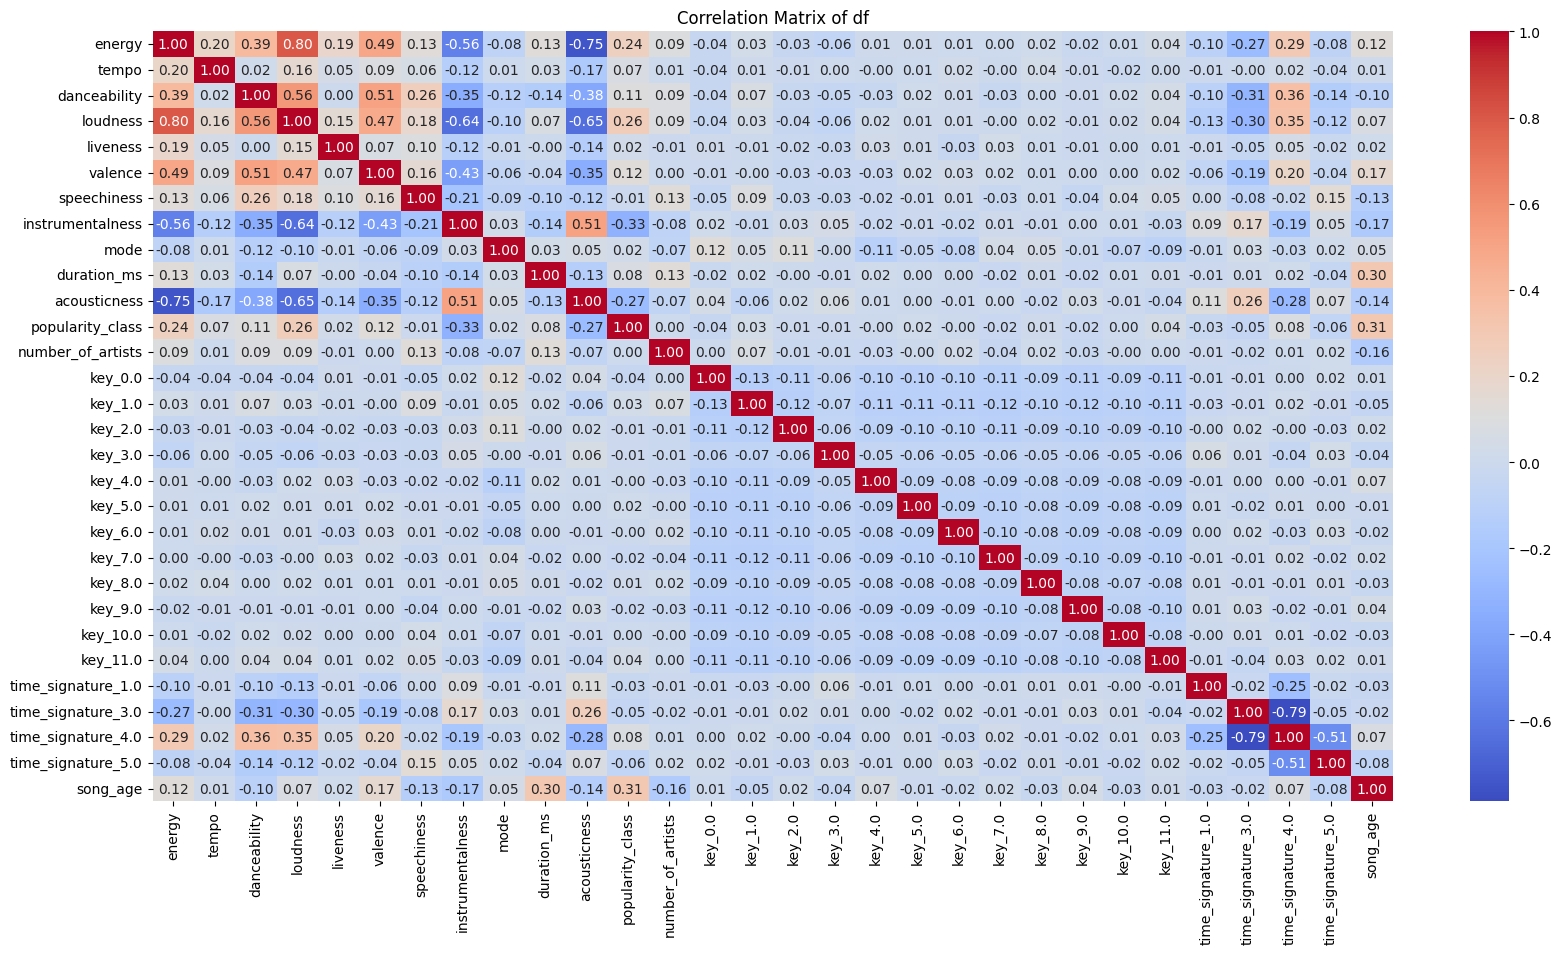

In [62]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of df")
plt.show()

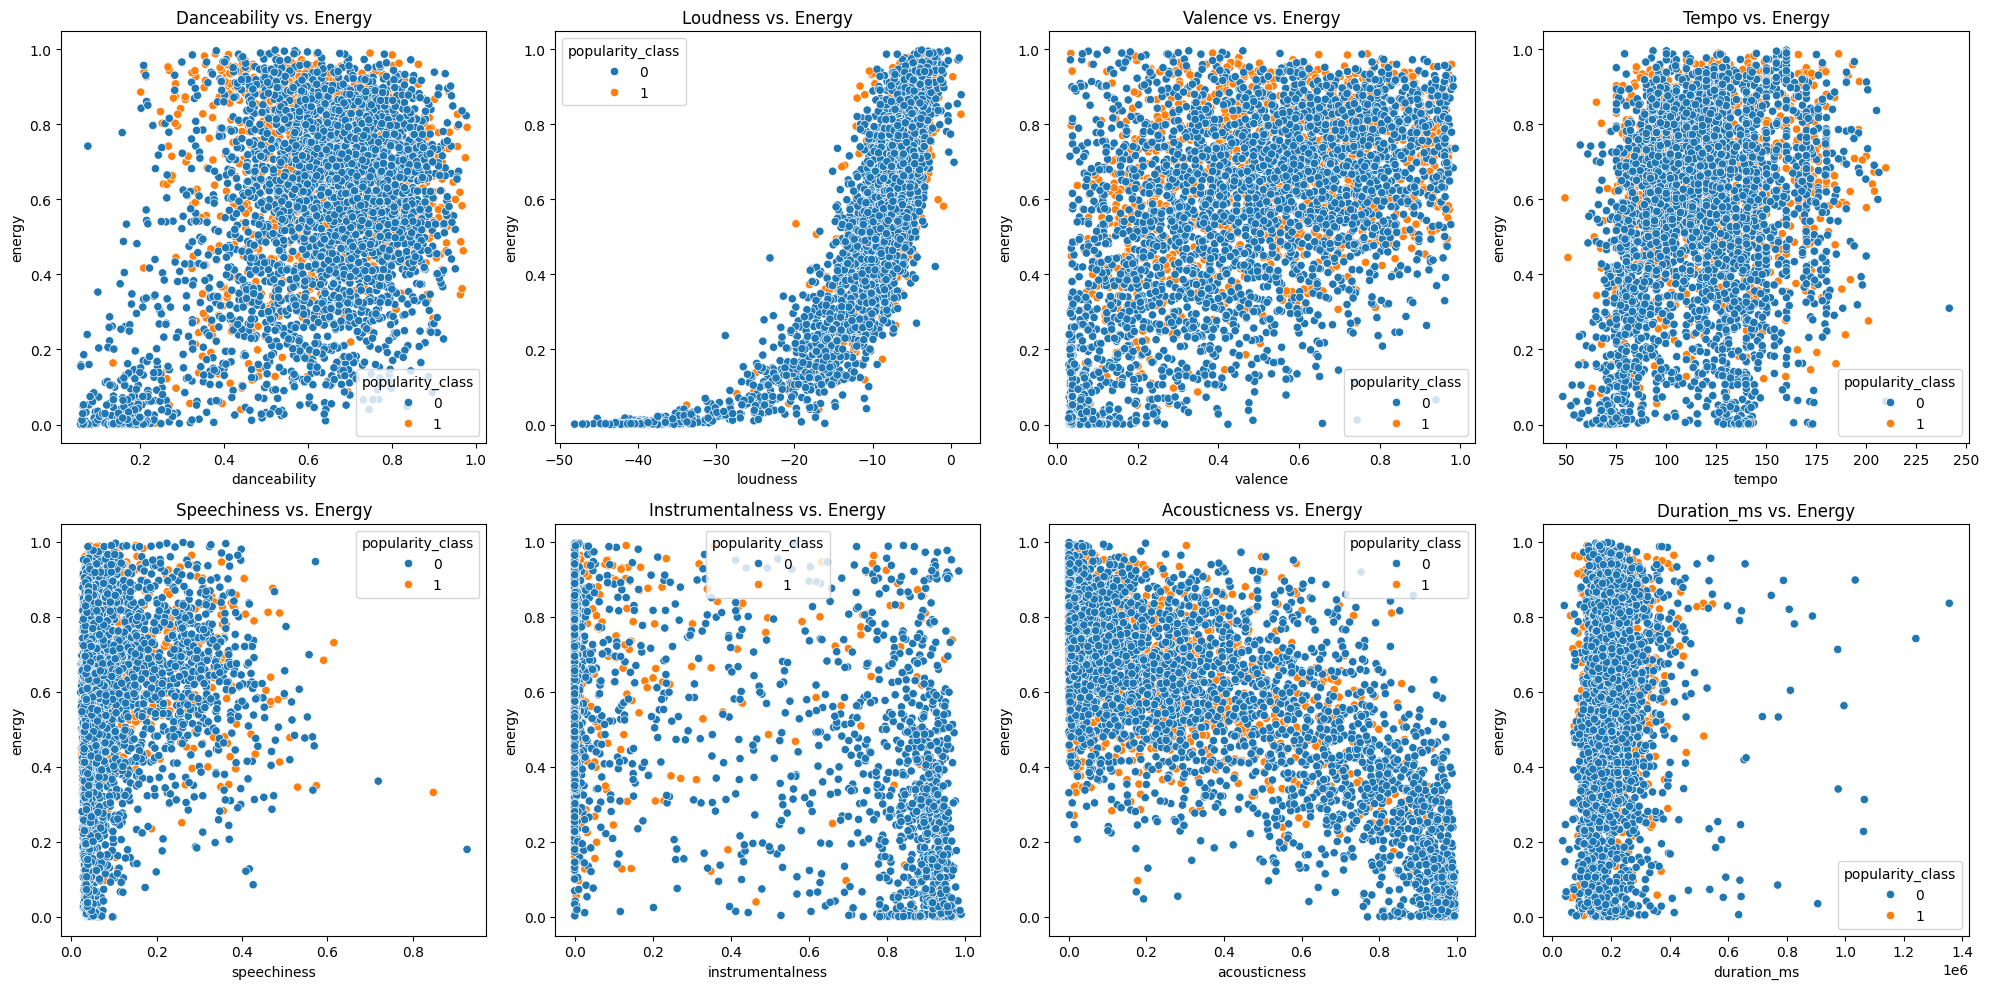

In [63]:
features_to_plot = ['danceability', 'loudness', 'valence', 'tempo', 'speechiness', 'instrumentalness', 'acousticness', 'duration_ms']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y='energy', hue='popularity_class', ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs. Energy')
plt.tight_layout()
plt.show()

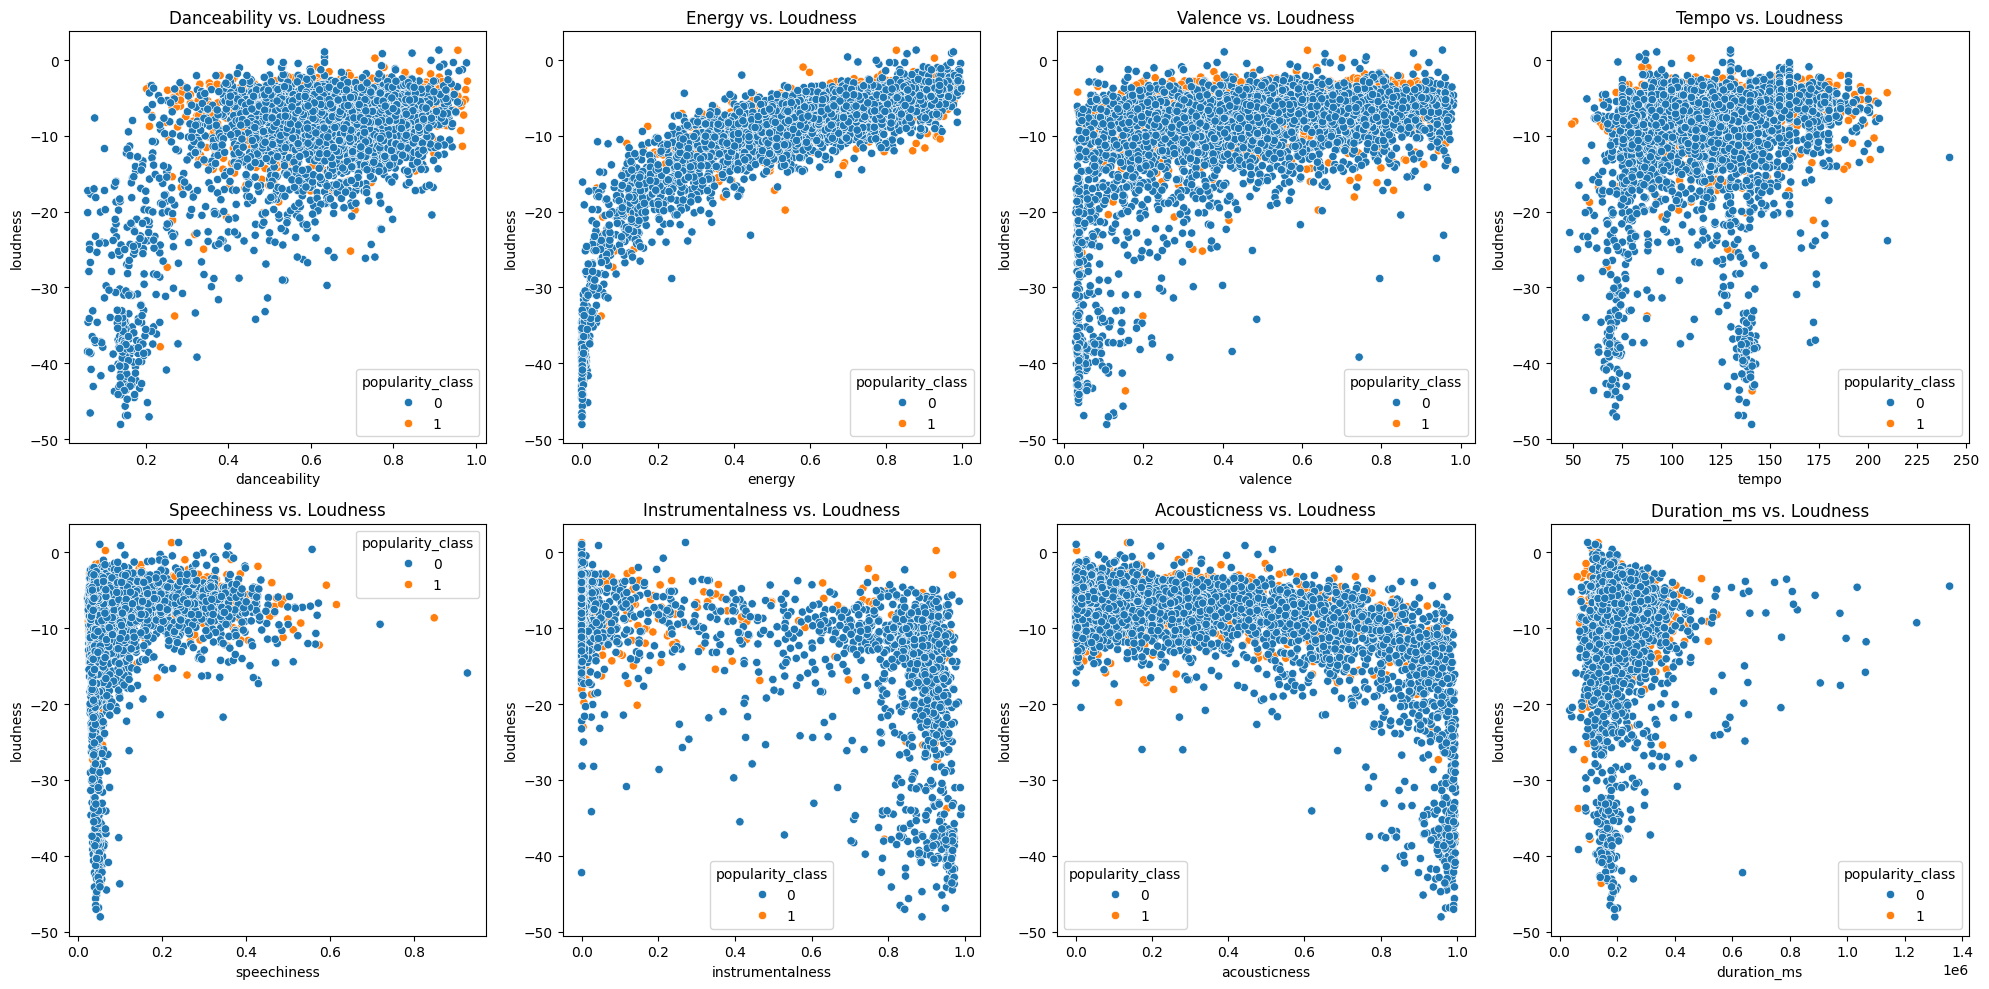

In [64]:
features_to_plot = ['danceability', 'energy', 'valence', 'tempo', 'speechiness', 'instrumentalness', 'acousticness', 'duration_ms']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()
for i, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y='loudness', hue='popularity_class', ax=axes[i])
    axes[i].set_title(f'{feature.capitalize()} vs. Loudness')
plt.tight_layout()
plt.show()

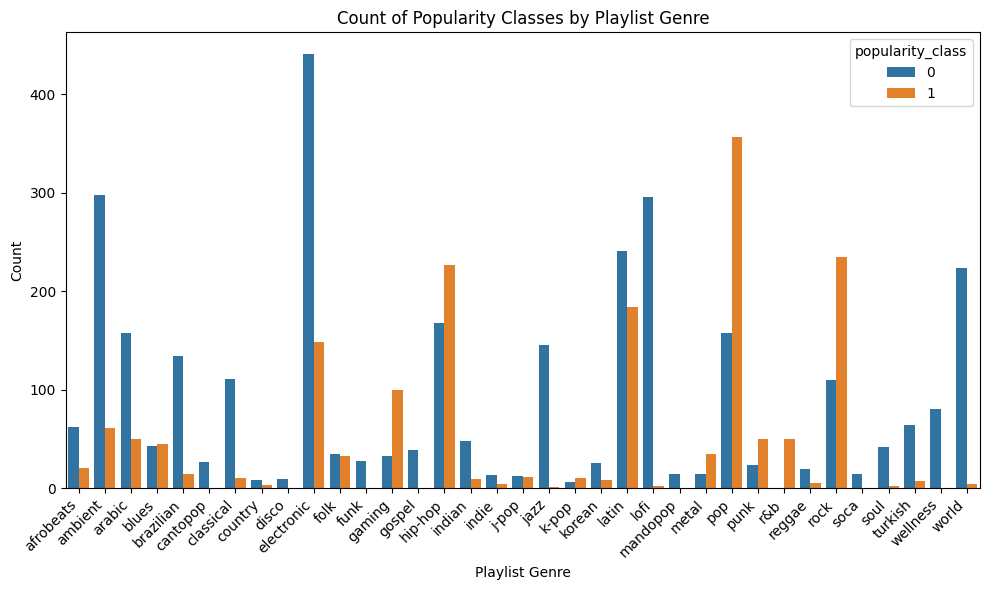

In [65]:
genre_counts = df_origin.groupby(['playlist_genre', 'popularity_class'])['popularity_class'].count().reset_index(name='count')

plt.figure(figsize=(10, 6)) 
sns.barplot(x='playlist_genre', y='count', hue='popularity_class', data=genre_counts)
plt.title('Count of Popularity Classes by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

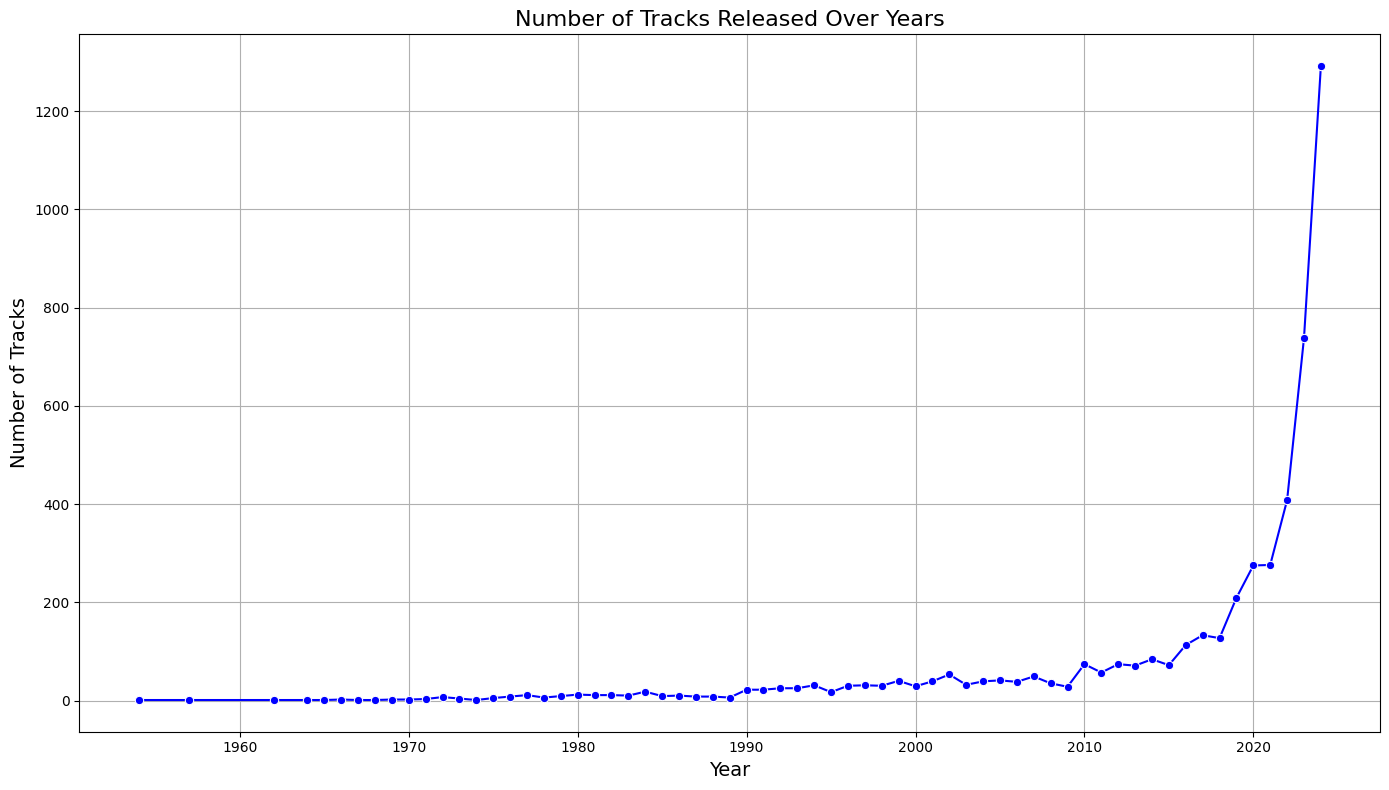

In [66]:
tracks_per_year = df_origin.groupby('year').size().reset_index(name='track_count')
plt.figure(figsize=(14, 8))
sns.lineplot(data=tracks_per_year, x='year', y='track_count', marker='o', color='blue')
plt.title('Number of Tracks Released Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

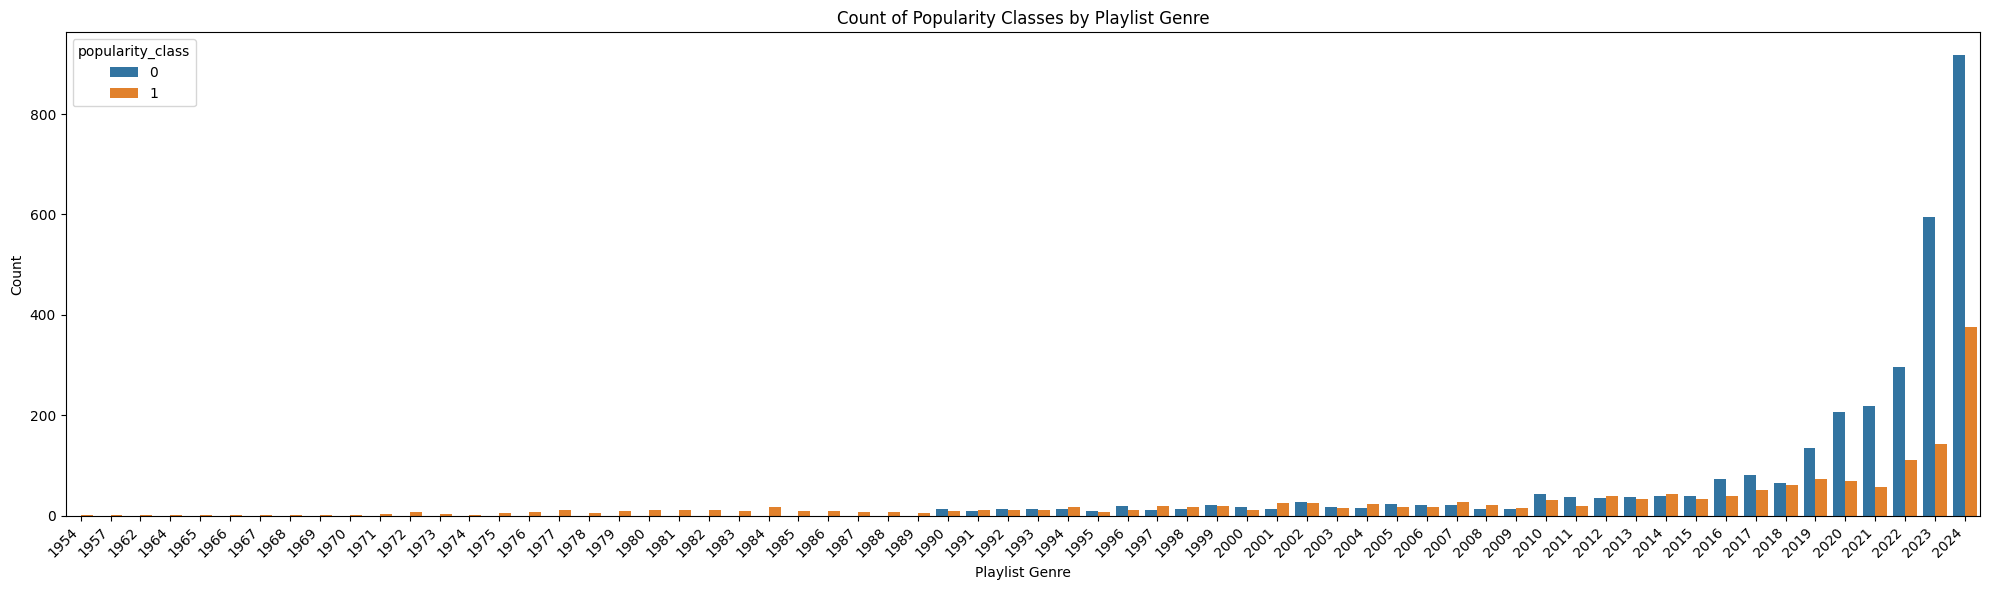

In [67]:
year_counts = df_origin.groupby(['year', 'popularity_class'])['popularity_class'].count().reset_index(name='count')

plt.figure(figsize=(20, 6)) 
sns.barplot(x='year', y='count', hue='popularity_class', data=year_counts)
plt.title('Count of Popularity Classes by Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Divisão dos Dados

In [72]:
validation_data = df[df['song_age'] == 0].sample(frac=0.2, random_state=101)
df = df.drop(validation_data.index)

In [75]:
X = df.drop('popularity_class', axis=1).reset_index(drop=True)
y = df['popularity_class'].reset_index(drop=True)